In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv('sentiment-analysis.csv')

In [3]:
df.head(10)

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."
5,"""The quality of this product is subpar."", Nega..."
6,"""I can't stop listening to this song. It's inc..."
7,"""Their website is so user-friendly. Love it!"",..."
8,"""I loved the movie! It was fantastic!"", Positi..."
9,"""The customer service was terrible."", Negative..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 1 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score  96 non-null     object
dtypes: object(1)
memory usage: 916.0+ bytes


In [5]:
df.isna().sum()

Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score    2
dtype: int64

In [6]:
df=df.dropna()

In [7]:
len(df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'][0].split(','))

7

In [8]:
df['Text']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[0])
df['Sentiment']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[1])
df['Source']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[2])
df['Date/Time']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[3])
df['User ID']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[4])
df['Location']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[5])
df['Confidence Score']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[6])


In [9]:
df.head(5)

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score",Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!"", Positive, Twitter, 202...","""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible."", Negative, Yelp Re...","""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!"", Positive, IMDb, 2023...","""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...","""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!"", Positive...","""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [10]:
df=df.drop(df.iloc[:,0:1], axis=1)

In [11]:
df.head(5)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [12]:
#saving all the instances of the column- "Text" in a list
sentences = df["Text"].values.tolist()
print(sentences[0:2])

['"I love this product!"', '"The service was terrible."']


In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    lowercase_tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [token for token in lowercase_tokens if token not in string.punctuation and token not in stop_words]
    return cleaned_tokens

# Apply preprocessing to each sentence
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]
print(preprocessed_sentences[0:2])

[['``', 'love', 'product', "''"], ['``', 'service', 'terrible', "''"]]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [16]:
sample_sentences=preprocessed_sentences[0:6]
preprocessed_text = [' '.join(tokens) for tokens in sample_sentences]
#print("Preprocessed text:",preprocessed_text) 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_text)
feature_names = vectorizer.get_feature_names_out()
# Convert the sparse matrix to a dense array
X_array = X.toarray()

# Print the feature names and the BoW matrix
print("The output is only on sentences 1 to 6")
print("\nFeature Names:", feature_names)
print("\nBoW Matrix:")
print(X_array)

The output is only on sentences 1 to 6

Feature Names: ['amazing' 'best' 'customer' 'disappointed' 'life' 'love' 'meal' 'movie'
 'product' 'quality' 'service' 'subpar' 'support' 'terrible']

BoW Matrix:
[[0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0]]


In [17]:
# Calculate word frequency from the BoW matrix
word_frequency = X_array.sum(axis=0)

# Create a dictionary with word frequencies
word_frequency_dict = dict(zip(feature_names, word_frequency))

# Print the word frequencies
print("The output is only on sentences 1 to 6")
for word, frequency in word_frequency_dict.items():
    print(f"{word}: {frequency}")

The output is only on sentences 1 to 6
amazing: 1
best: 1
customer: 1
disappointed: 1
life: 1
love: 1
meal: 1
movie: 1
product: 2
quality: 1
service: 1
subpar: 1
support: 1
terrible: 1


In [18]:
!pip install textblob 
from textblob import TextBlob


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [19]:
df.iloc[:, 1].value_counts()
total = len(df.iloc[:,1])
 
# Print the total number of values
print("Total number of values in column 'Text':", total)

Total number of values in column 'Text': 96


In [20]:
column=df.iloc[:,1]
column.tail(2)

94     Negative
95     Positive
Name: Sentiment, dtype: object

In [21]:
#this code makes two arrays that will contain polarity and subjectivity of the whole dataset
val,pol,sub=[],[],[]
for i in range(0,total):
    val.append(i)
    pol.append(i)
    sub.append(i)
    pol[i]=TextBlob(column[i]).sentiment.polarity
    sub[i]=TextBlob(column[i]).sentiment.subjectivity
    if pol[i]==0:
        val[i]="Neutral"
    elif pol[i]>0 and pol[i]<=1:
        val[i]="Positive"
    else:
        val[i]="Negative"

print(val[23])
print(pol[23])

Negative
-0.3


In [22]:
new_column_name = 'Calculated Sentiment'
new_column_df = pd.DataFrame({new_column_name: val})

# Append the new column to the existing DataFrame
df[new_column_name] = new_column_df[new_column_name]

In [23]:
df.head(10)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Calculated Sentiment
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,Positive
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,Negative
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,Positive
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,Negative
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,Positive
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72,Negative
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91,Positive
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87,Positive
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92,Positive
9,"""The customer service was terrible.""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65,Negative


In [24]:
sentiment=df.iloc[:, 1]
print(sentiment)
calculated=df.iloc[:,7]
print(calculated)

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
        ...    
91     Positive
92     Negative
93     Positive
94     Negative
95     Positive
Name: Sentiment, Length: 96, dtype: object
0     Positive
1     Negative
2     Positive
3     Negative
4     Positive
        ...   
91    Positive
92    Negative
93    Positive
94    Negative
95    Positive
Name: Calculated Sentiment, Length: 96, dtype: object


In [25]:
#initialising array
correct=[]
#checking if both the rows are same
for i in range(0,total):
    #initialising here in order to avoid another for loop for optimising time complexity.
    sentiment[i]=sentiment[i].lstrip()
    correct.append(i)
    if(sentiment[i]==calculated[i]):
        correct[i]="Yes"
    else:
        correct[i]="No"
print(correct[0])

Yes


In [26]:
new_column_name = 'Correctly calculated'
new_column_df = pd.DataFrame({new_column_name: correct})

# Append the new column to the existing DataFrame
df[new_column_name] = new_column_df[new_column_name]

In [27]:
df.head(32)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Calculated Sentiment,Correctly calculated
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,Positive,Yes
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,Negative,Yes
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,Positive,Yes
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,Negative,Yes
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,Positive,Yes
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72,Negative,Yes
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91,Positive,Yes
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87,Positive,Yes
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92,Positive,Yes
9,"""The customer service was terrible.""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65,Negative,Yes


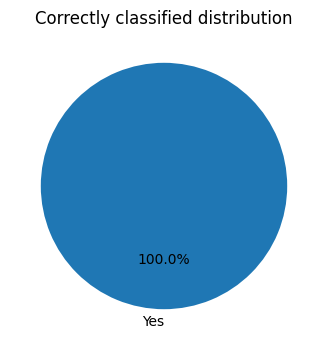

In [28]:
class_counts = df['Correctly calculated'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Correctly classified distribution')
plt.show(
    
)